# <center>8. Закрепление знаний

✍️ Настало время потренироваться в очистке данных! В этот раз тема особенно важная — поговорим о диабете.

Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


#### Признаки в данных

* Pregnancies — количество беременностей.

* Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

* BloodPressure — диастолическое артериальное давление (мм рт. ст.).

* SkinThickness — толщина кожной складки трицепса (мм).

* Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

* BMI — индекс массы тела

* DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

* Age — возраст.

* Outcome — наличие диабета (0 — нет, 1 — да).

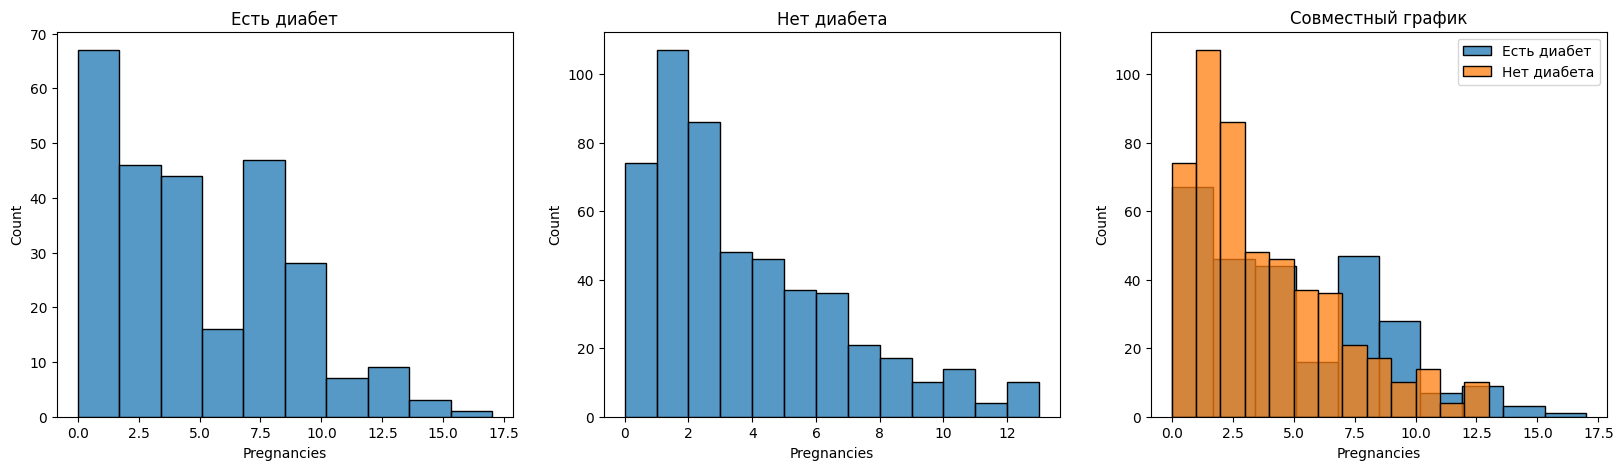

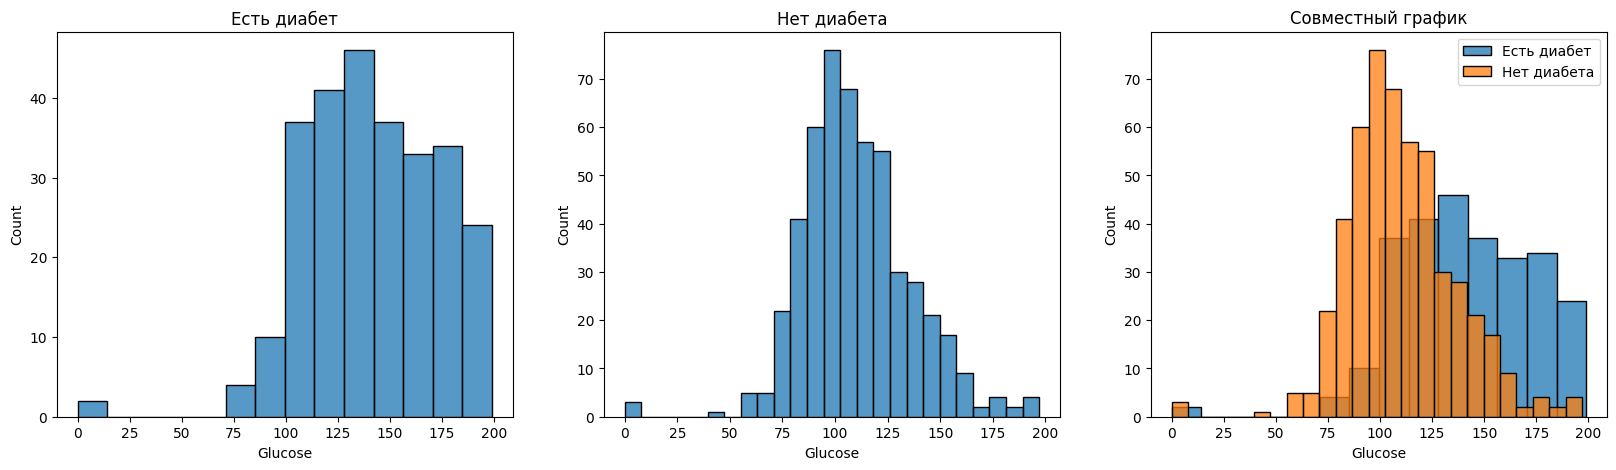

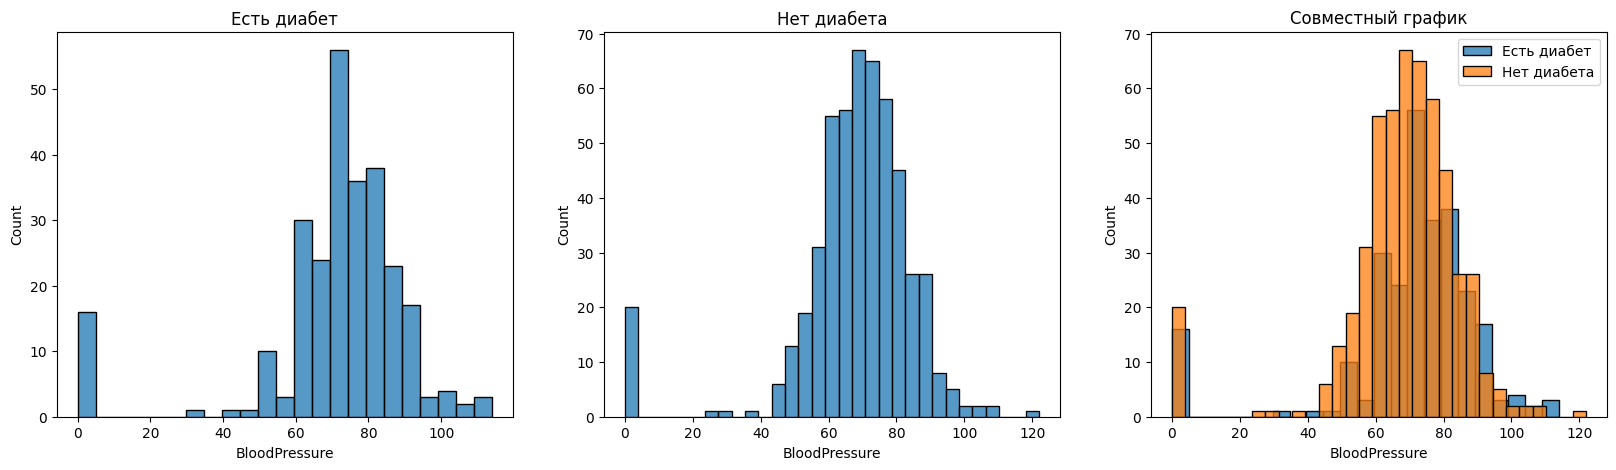

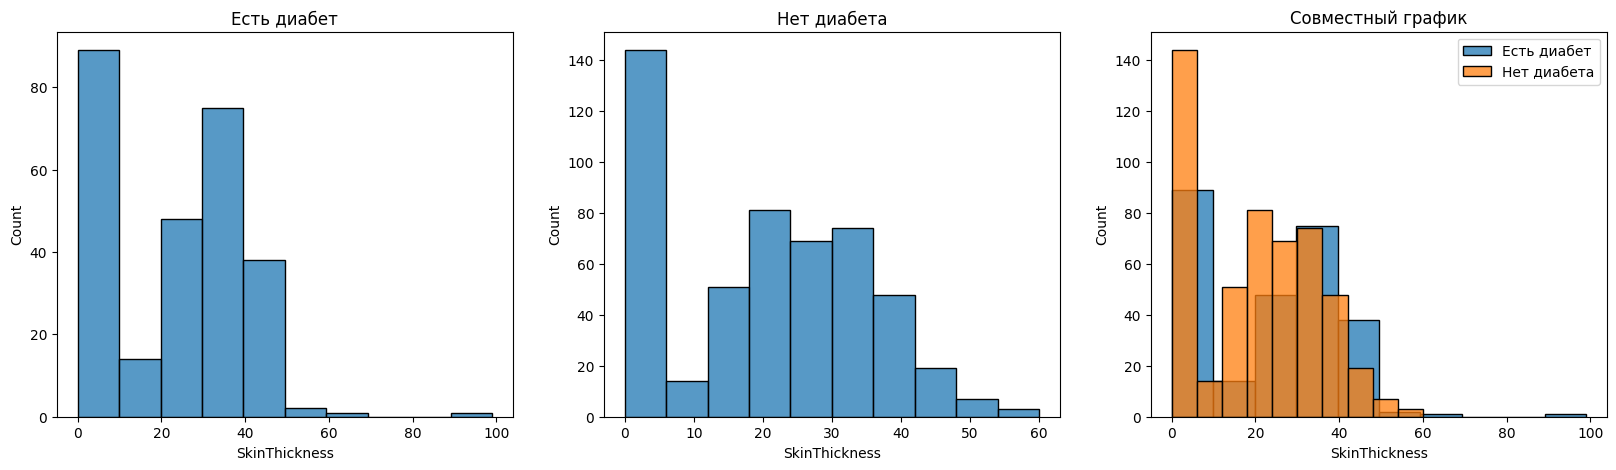

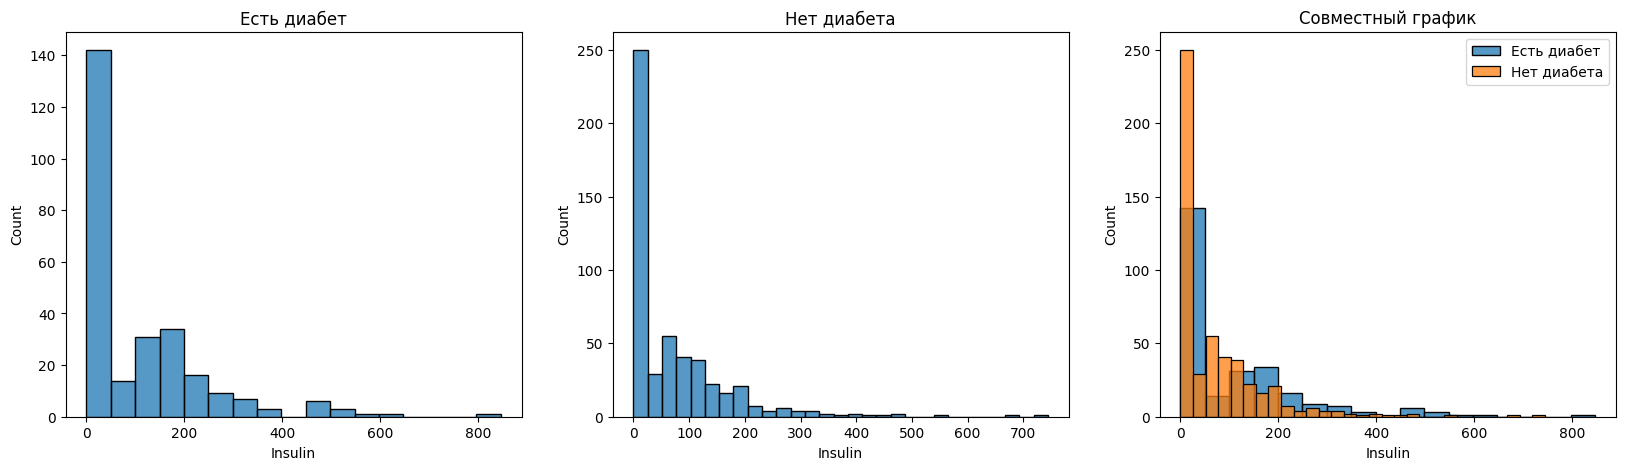

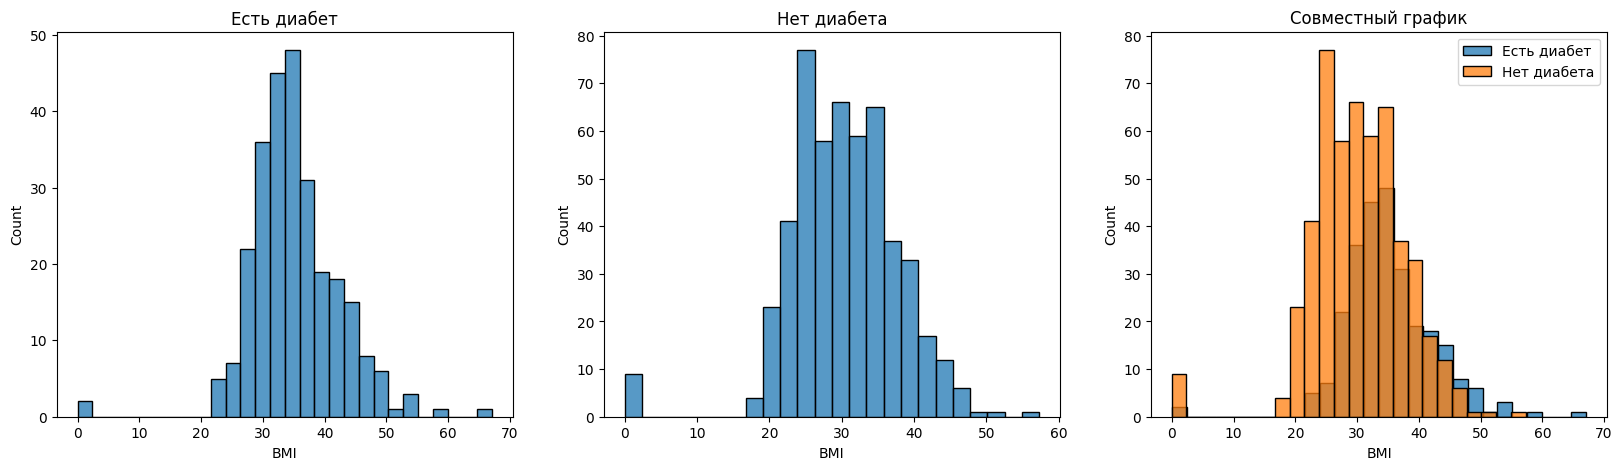

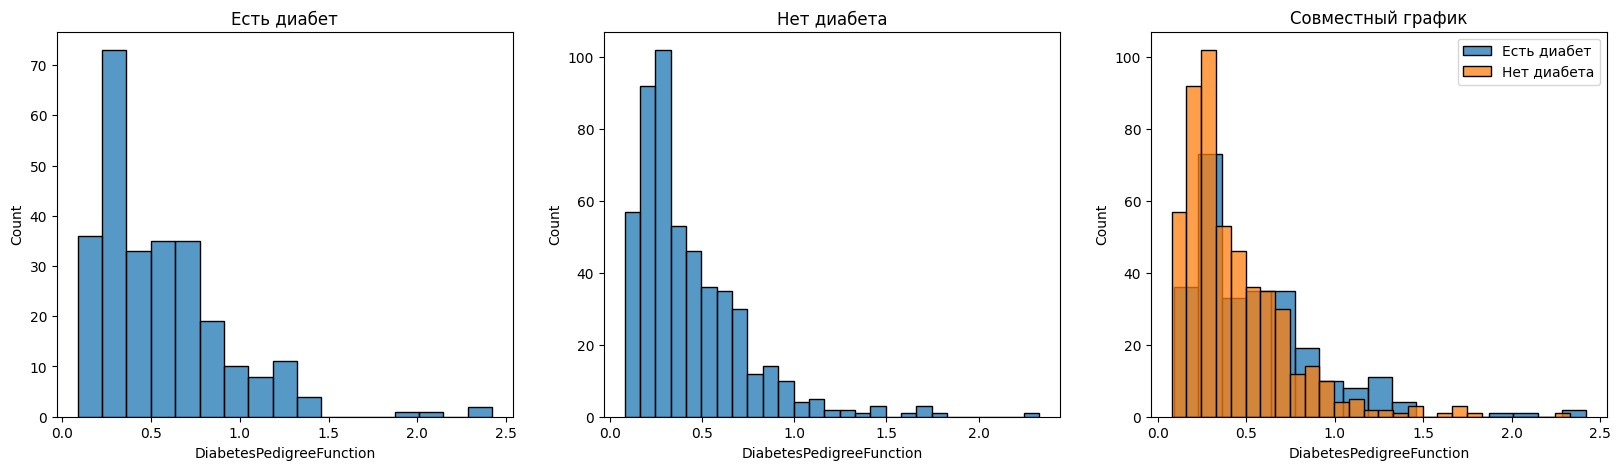

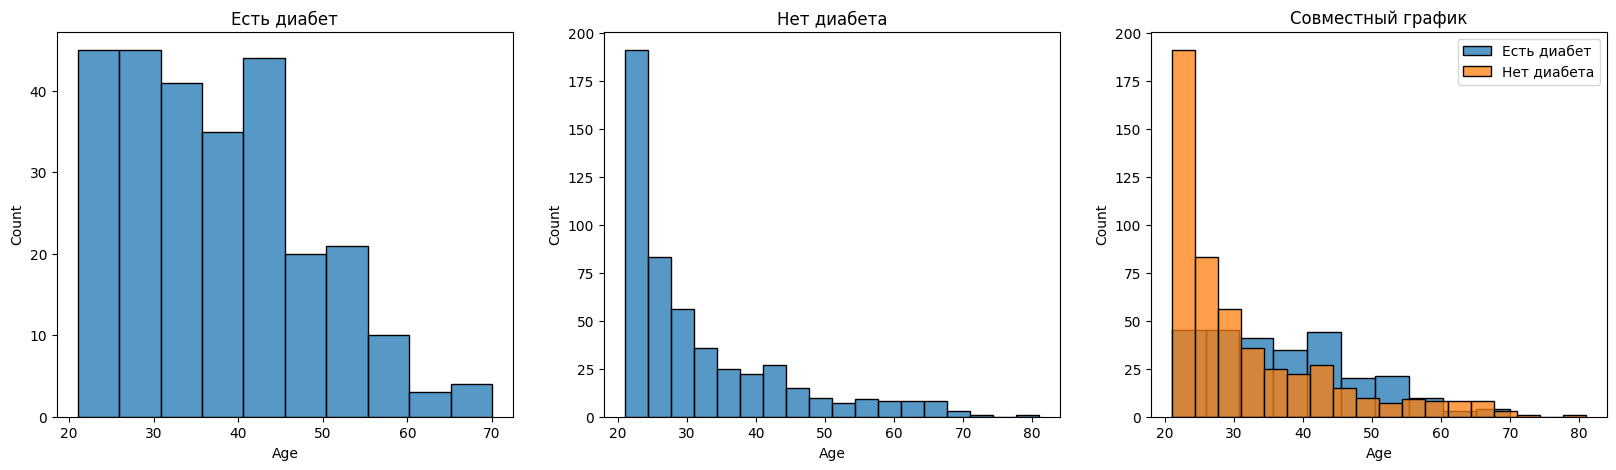

In [70]:
#diabetes.hist(figsize=(20, 8));
#display(diabetes.columns)
#diabetes[diabetes["Outcome"]==1].hist(figsize=(20, 8));
#diabetes[diabetes["Outcome"]==0].hist(figsize=(20, 8));
for col in diabetes.columns:
    if col == 'Outcome' or col == 'Gender':
        continue
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    sns.histplot(diabetes[diabetes["Outcome"]==1][col],ax=axes[0])
    axes[0].set_title("Есть диабет")
    sns.histplot(diabetes[diabetes["Outcome"]==0][col],ax=axes[1])
    axes[1].set_title("Нет диабета")
    sns.histplot(diabetes[diabetes["Outcome"]==1][col],ax=axes[2])
    sns.histplot(diabetes[diabetes["Outcome"]==0][col],ax=axes[2])
    axes[2].set_title("Совместный график")
    axes[2].legend(['Есть диабет', 'Нет диабета'])

8.1 Начнем с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [71]:
diabetes_df = diabetes.copy()
display(diabetes_df.shape[0])
"""diabetes_df = diabetes_df.drop_duplicates()
display(diabetes_df.shape[0])"""

dupl_columns = list(diabetes_df.columns)

mask = diabetes_df.duplicated(subset=dupl_columns)
sber_duplicates = diabetes_df[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')
diabetes_df = diabetes_df.drop_duplicates(subset=dupl_columns)
display(diabetes_df.shape[0])

778

Число найденных дубликатов: 10


768

8.2 Найдите все неинформативные признаки в данных и избавьтесь от них. В качастве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли.

In [72]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_df.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_df[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_df[col].nunique() / diabetes_df[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabetes_df = diabetes_df.drop('Gender', axis=1)
print(diabetes_df.columns)

Gender: 100.0% одинаковых значений
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


8.3 Попробуйте найти пропуски в данных с помощью метода isnull(). (Их нет).

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска (np.nan из NumPy).  
Какая доля пропусков в столбце Insulin? Ответ округлите до сотых.

In [73]:
import numpy as np
display(diabetes_df.info())

def replace_null_to_nan(obj):
    if obj == 0:
        return np.nan
    return obj

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    diabetes_df[col] = diabetes_df[col].apply(replace_null_to_nan)

display(diabetes_df.info())
print(round(diabetes_df['Insulin'].isnull().value_counts(normalize=True),2))

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


None

Insulin
False    0.51
True     0.49
Name: proportion, dtype: float64


8.4 Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [74]:
#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = diabetes_df.shape[0] #число строк в таблице
x = n*0.7
display(diabetes_df.shape)
print(diabetes_df.isnull().mean().round(2).sort_values(ascending=False))
diabetes_df = diabetes_df.dropna(thresh=x, axis=1)

display(diabetes_df.shape)
print(diabetes_df.isnull().mean().round(2).sort_values(ascending=False))

(768, 9)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
BMI                         0.01
Glucose                     0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64


(768, 8)

SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64


8.5 Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [75]:
#отбрасываем строки с числом пропусков более 2 в строке
m = diabetes_df.shape[1] #число признаков после удаления столбцов
diabetes_df = diabetes_df.dropna(thresh=m-2, axis=0)
print(diabetes_df.shape)

(761, 8)


8.6 В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [76]:
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = dict()
columns = diabetes_df.columns
for col in columns:
    values[col] = diabetes_df[col].median()

#заполняем оставшиеся записи константами в соответствии со словарем values
diabetes_df = diabetes_df.fillna(values)
print(round(diabetes_df['SkinThickness'].mean(), 1))

29.1


8.7 Сколько выбросов найдет классический метод межквартильного размаха в признаке SkinThickness?

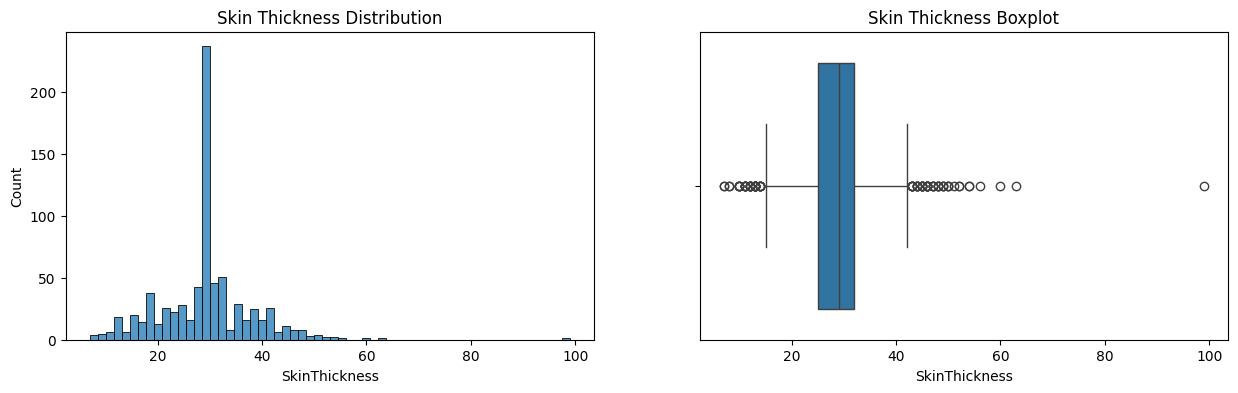

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=diabetes_df, x='SkinThickness', ax=axes[0]);
histplot.set_title('Skin Thickness Distribution');
boxplot = sns.boxplot(data=diabetes_df, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Skin Thickness Boxplot');

In [78]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes_df, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


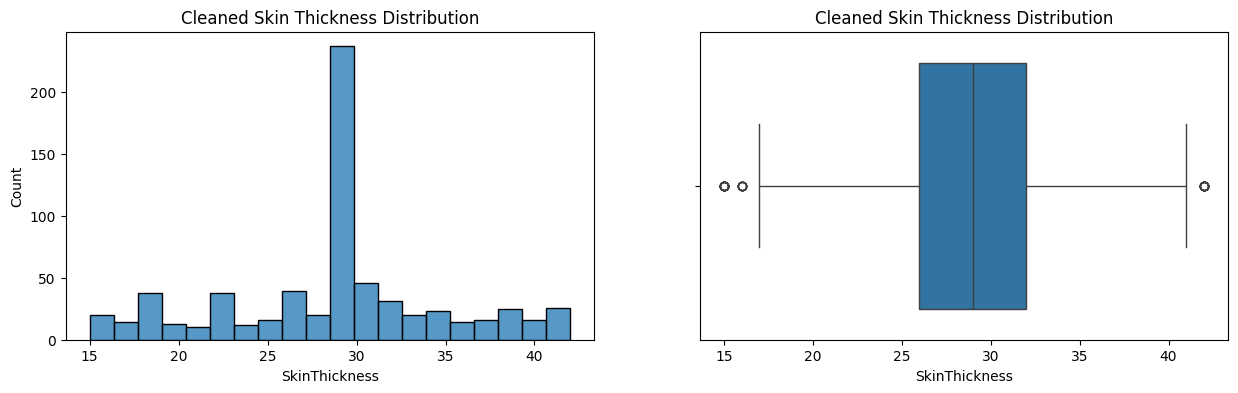

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned Skin Thickness Distribution');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned Skin Thickness Distribution');

8.8 Сколько выбросов найдет классический метод z-отклонения в признаке SkinThickness?

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


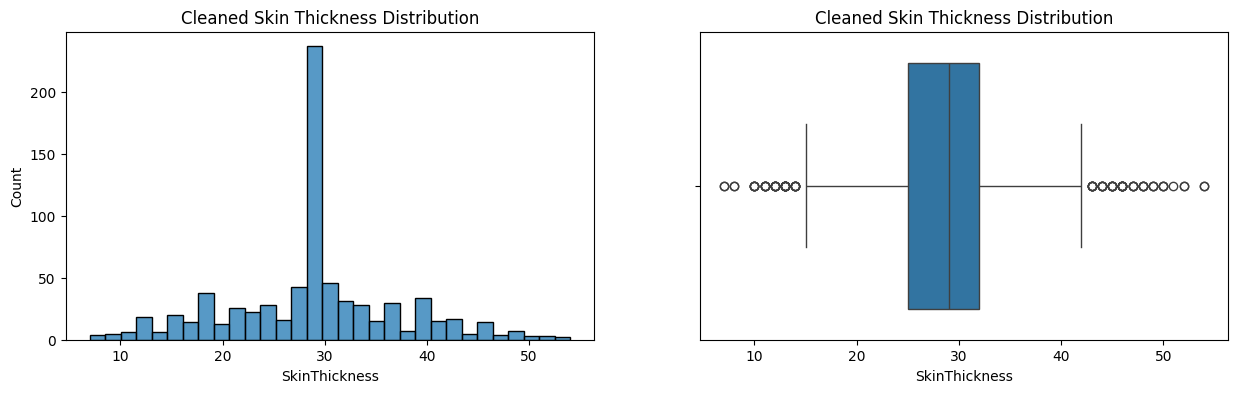

In [80]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(diabetes_df, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned Skin Thickness Distribution');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned Skin Thickness Distribution');

8.9 На приведенной гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу добавлять не нужно!). Какова разница между этими двумя числами (вычтите из первого второе).

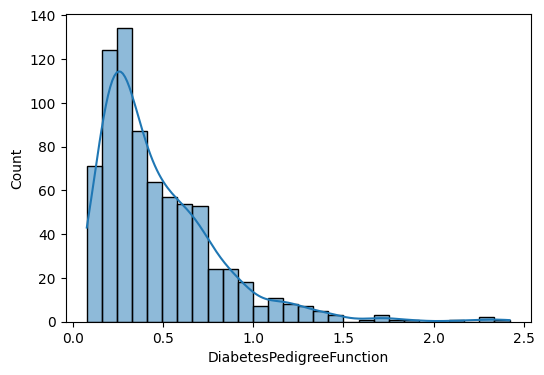

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
histplot = sns.histplot(data=diabetes_df, x='DiabetesPedigreeFunction', ax=axes, kde=True);

In [84]:
outliers, cleaned = outliers_iqr_mod(diabetes_df, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

def outliers_iqr_mod_log(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod_log(diabetes_df, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки (log): {outliers.shape[0]}')
print(f'Результирующее число записей (log): {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732
Число выбросов по методу Тьюки (log): 0
Результирующее число записей (log): 761
